# Apr 11, 2019
## sound
2018020143 민정원

# 1. 개념
* sampling rate(sr) : 1초에 몇 개의 소리 정보를 담을까?
cf. analogue : continuous info
cf. digital : discrete info
* sine wave : 모든 sound는 다양한 frequency, amplitude를 가진 단순한 형태의 sine wave의 합
* sine wave의 요소
1. frequency : 단위 시간 당 한 주기가 반복되는 횟수, 소리의 높낮이 결정지음
ex. 1초에 100번 왔다갔다한다 : 100Hz
2. amplitude : 크면 소리가 크다
(1과 2는 독립적 요소)

# 2. 필요한 라이브러리 불러들이기

In [26]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import IPython.display as ipd 
import numpy as np
%matplotlib notebook
from scipy.signal import lfilter

# 3. Phasor
: sine wave 꼴을 만들어주는 소프트웨어
phasor 내에는 sine 뿐 아니라 cosine wave도 존재. 따라서 phasor는 통합적인 개념  

In [27]:
# parameter setting
amp = 1          # 진폭이 -1부터 1까지, amp=2이면 진폭이 -2부터 2까지
sr = 10000       # sampling rate, 단위는 Hz(1초에 10,000개의 정보가 들어가 있다)
dur = 0.5        # 초 단위로 나타냄, 0.5초를 길이로 한다는 의미
freq = 100.0     # Hz(sr과는 같은 unit을 쓰지만 다른 개념)
# sr : 단위 시간 당 숫자정보가 몇개 나오냐
# freq : 정확하게 sine wave의 ᄁᆃᆯ이 1초에 "?"번 반복해야한다

# 4. sine 함수
* sine 함수는 np 라이브러리 안에 
* np.sin(?)
* ?에 넣을 수 있는 숫자 : 각도값, 직접적인 숫자로(ex.45도) 받지 않고 radian으로 받음
* 실제로 sine wave로 소리를 만들어내려면 **"시간"** 개념을 부여해줘야 함
* x축에 각도값만 있으면 안 되고 **"시간"** 을 만들어줘야 하기 때문에 부여한 theta 값을 시간 개념으로 변형해야 한다는 의미
* 각도와 시간에 관계를 부여하기 위해서는 freq개념 필요

## step 1. generate time
: 시간 만들어주기

In [28]:
t = np.arange(1, sr * dur+1)/sr 
# np 안의 arrange는 두 개의 값을 받음, 여기서는 1과 sr * dur+1, 
# t = np.arange(1, sr) : 1부터 9,999초까지 만들어냄, 위에서 sr을 10,000으로 가정하였고, ()이므로 1에서 sr 즉 10,000미만까지를 받는다는 의미
# t = np.arange(1, sr+1) : 1부터 10,000초까지 만들어냄, 1부터 10,000+1미만까지 받는다는 의미이므로
# t = np.arange(1, sr+1)/sr : 1/10,000부터 1s까지, 즉 총 10,000개의 조각을 만들었음
# t = np.arange(1, sr*0.5)/sr : 1/10,000부터 0.5s(5,000/10,000s) 미만까지 받아들이기
# t = np.arange(1, sr*0.5+1)/sr : 1/10,000s부터 1/5,000s까지 받아들이기

## step 2. generate phase
: freq으로 각도와 시간에 관계 부여
* 파이썬은 pi를 이해하지 못함. np라이브러리의 pi를 사용해야하므로 반드시 np.pi라고 해줌
* 각도를 다시 정의하는데 이때 시간과 freq을 넣어줌
* 이 과정을 통해 time과 theta가 같은 개념이 됨, 즉 sinc 된 상태(time에서 theta로 convert된 것)

In [29]:
theta = t * 2*np.pi * freq 
"""
theta = 각도값 
t = 시간 
2*np.pi() = 360도
"""

'\ntheta = 각도값 \nt = 시간 \n2*np.pi() = 360도\n'

## step 3. generate signal by cosine-phasor

In [30]:
s = np.sin(theta) #t, theta, s에는 모두 10,000개의 정보가 들어와있음

<IPython.core.display.Javascript object>


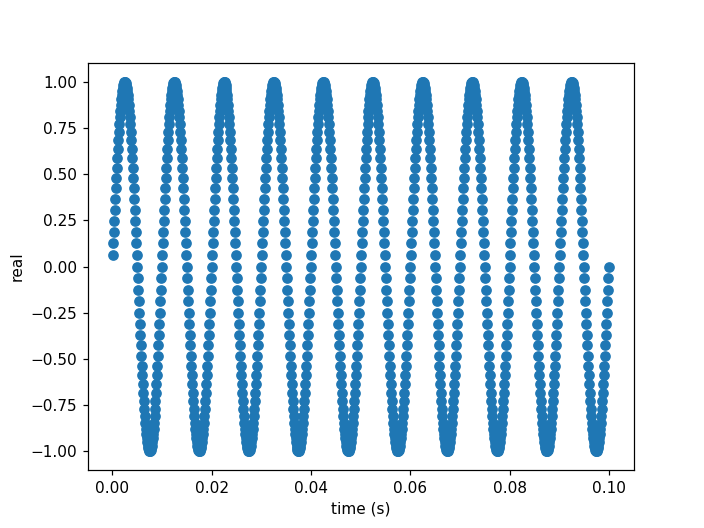

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000], 'o') # plotting에는 theta가 쓰이지 않고 있음(plot 시 t와 s를 사용, 즉 x축은 time이고 y축은 plot한 sine 값)
ax.set_xlabel('time (s)') 
ax.set_ylabel('real')
ipd.Audio(s, rate=sr) #freq 작으면 잘 안들림, 값이 높을수록 높은 소리

## step 4. generate signal by complex-phasor
* np.sin대신 np.exp 이용, 즉 sin(theta) 대신 자연로그 e를 사용하는 단계
* sin(theta)-> e^theta*i로 바꾸어주기
* 통상적으로 1*j=i라고 하여 sin(theta)-> e^theta*j
* i를 이용하는 순간 실수 범위에서 복소수 범위로 확장됨 
* 이전 단계에서까지는 그래프에 시간과 sine값을 표현하였다면 본 단계에서는 i를 도입함으로써 그래프에 시간, 실수부분 값, 허수부분 값 세 가지 정보를 그려내야하기 때문에 한 차원이 더 필요함

In [32]:
c = np.exp(theta*1j)

<IPython.core.display.Javascript object>


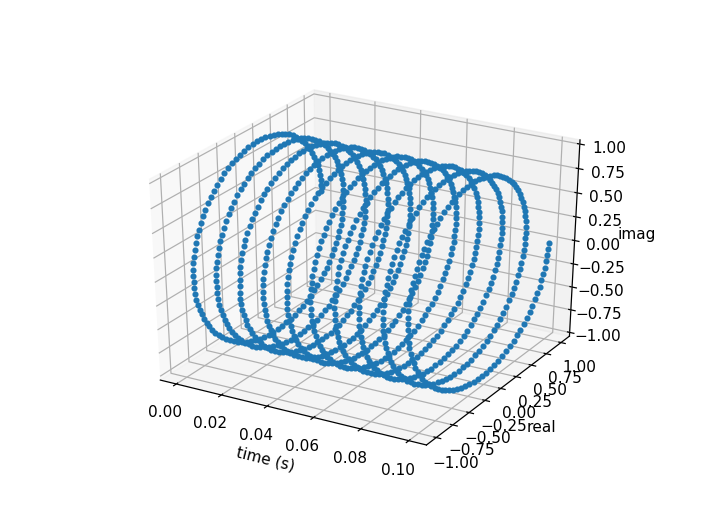

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(t[0:1000], c.real[0:1000], c.imag[0:1000], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ax.set_zlabel('imag')
ipd.Audio(s, rate=sr)